In [1]:
using Revise
push!(LOAD_PATH, "../src") 
using DataFrames
using CovidDepressionAnalysis
using CSV
using Counterfactuals
using Plots
using PairPlots
using GLM
using Statistics

In [2]:
println("Processing:")
println("../output/IP_weighted_sources/w12.csv")
data = CSV.read("../output/IP_weighted_sources/w12.csv", DataFrame)
data = data[Not(isnan.(data[!, :cvd_cases_7d_avg])), :]

adjustments = ["cvd_cases_7d_avg", "cvd_deaths_7d_avg"]
square_terms = ["cvd_cases_7d_avg", "cvd_deaths_7d_avg"]
treatment = "Mandatory_SAH"
target = "Depression_adj"

Processing:
../output/IP_weighted_sources/w12.csv


"Depression_adj"

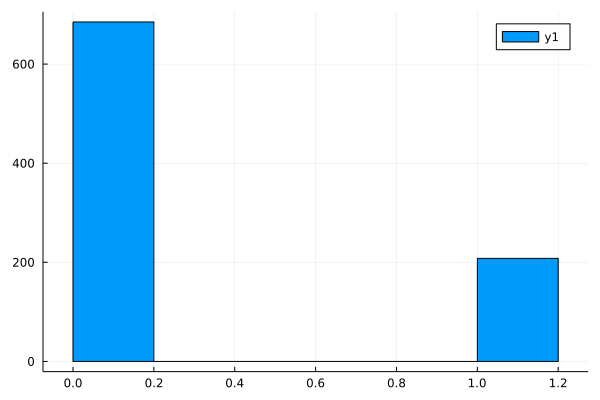

In [4]:
histogram(data[!, treatment])

In [10]:
effects, mean_effect, CI = estimate_ipw(data, adjustments, square_terms, treatment, target, 1000)


([-69.5504072786804, -53.64789393856909, -21.468661809349776, -57.243203226032264, -66.52839571861276, -67.13079768393017, -35.58775110494134, -60.58863086483662, -44.10379146681325, -41.267886865686755  …  -66.65611254141457, -44.91614455344117, -76.5763974729624, -63.9992768019357, -41.82586225068852, -56.905890288814945, -60.137030683014636, -51.168908475781635, -25.394552014675636, -54.59973418679418], -40456.87350551378, [-91.62774289851004, -29.049674474569002])

In [11]:
max(mean_effect)

-40456.87350551378

In [4]:
mean(effects)

-580.2744982429762

In [8]:
CI

2-element Vector{Float64}:
 -92.51436584811502
 -28.90217420278755

In [81]:
mean(effects, dim=2)

MethodError: MethodError: objects of type Float64 are not callable

In [77]:
mean(effects)

MethodError: MethodError: objects of type Float64 are not callable

In [27]:
data = CSV.read("../data/data_all_impute.csv", DataFrame)

# interpolate age from wave 1 to other waves
interpolate_age_race(data)
# Load Data
external_data = CSV.read("../data/externalMeasures_county.csv", DataFrame)
external_subset = external_data[external_data[!, "wave_day"] .== "start_date", :]
total_data = leftjoin(data, external_subset, on=["PROLIFIC_PID", "wave"])

,Column1,PROLIFIC_PID,wave,Fear_COVID_raw,Disgust_COVID_raw,DISG1.1_20
,Int64,String31,Int64,Int64,Int64,Float64
1,0,5df82e8739bcde5dd044f741,1,8,11,1.0
2,3,5c7e91c1973c990016ea72b0,1,24,27,5.0
3,3745,5e753094e8a6f10a9805ed9a,1,15,3,1.0
4,19,5e67052c757e6149c38ce468,1,18,13,5.0
5,4142,5e7745990fd39b2a816ec341,1,11,23,4.0
6,28,5d89106d1719af0001ee23e5,1,8,16,5.0
7,4807,5dc5bd296a8a334443fbf216,1,26,20,5.0
8,5608,5dce29700ad506063969a4a5,1,12,16,4.0
9,44,5d6394518df2870001a74b42,1,23,26,5.0


In [66]:
data[!, :Mandatory_SAH]

18493-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [30]:
total_data[ismissing.(total_data[!,"gatherBan_N_limit"]),"gatherBan_N_limit"]

0-element PooledArrays.PooledVector{Union{Missing, String7}, UInt32, Vector{UInt32}}

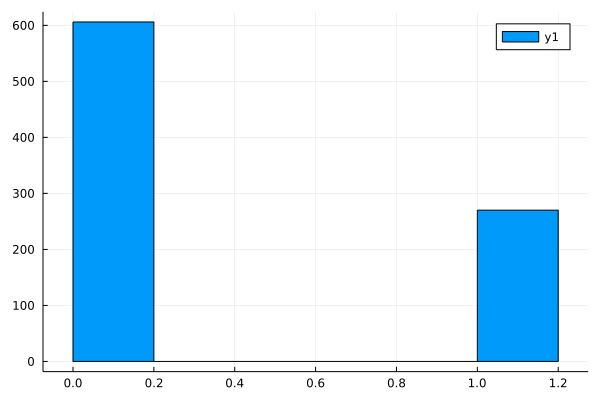

In [41]:
histogram(total_data[total_data[!, "wave"].==16, "Mandatory_SAH"])

In [42]:
total_data[!, "DemW3"]

18493-element Vector{Union{Missing, Float64}}:
  5.0
  5.0
 49.0
  5.0
 35.0
  5.0
 47.0
 17.0
  5.0
 10.0
  ⋮
 12.0
   missing
   missing
   missing
   missing
   missing
   missing
   missing
   missing

In [43]:
external_state = CSV.read("../data/w1-w16_external_combined.csv", DataFrame)

,Column1,wave,States,cumulative_cases,new_cases,slope_new_cases
,Int64,Int64,String31,Float64,Float64,Float64
1,0,1,Alabama,1535.0,130.286,2.28571
2,1,1,Alaska,156.0,9.57143,-0.571429
3,2,1,Arizona,1769.0,178.0,20.2857
4,3,1,Arkansas,738.0,47.7143,-2.71429
5,4,1,California,12569.0,1175.71,82.2857
6,5,1,Colorado,4182.0,359.0,9.42857
7,6,1,Connecticut,4915.0,536.0,18.2857
8,7,1,Delaware,450.0,54.1429,13.4286
9,8,1,District of Columbia,757.0,85.4286,15.4286


In [47]:
external_state[external_state[!, "States"] .== "Florida", "Mandatory_SAH"]

16-element Vector{Union{Missing, Float64}}:
 1.0
 1.0
 1.0
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [ ]:
total_data[]

In [61]:
w2 = total_data[total_data[!, "wave"].==2, :]

,Column1,PROLIFIC_PID,wave,Fear_COVID_raw,Disgust_COVID_raw,DISG1.1_20
,Int64,String31,Int64,Int64,Int64,Float64
1,1,5df82e8739bcde5dd044f741,2,7,12,1.0
2,4,5c7e91c1973c990016ea72b0,2,25,26,5.0
3,3746,5e753094e8a6f10a9805ed9a,2,10,8,1.0
4,20,5e67052c757e6149c38ce468,2,14,14,5.0
5,4143,5e7745990fd39b2a816ec341,2,8,21,2.0
6,29,5d89106d1719af0001ee23e5,2,7,20,5.0
7,4808,5dc5bd296a8a334443fbf216,2,24,20,3.0
8,5609,5dce29700ad506063969a4a5,2,12,11,3.0
9,45,5d6394518df2870001a74b42,2,22,29,5.0


In [64]:
w2[w2[!, "DemW3"] .== 9, :]

ArgumentError: ArgumentError: unable to check bounds for indices of type Missing

In [ ]:
w1_ca[w1_ca[!, "stayHome_order_code"]]

In [2]:
w6 = CSV.read("../output/IP_weighted_sources/w6.csv", DataFrame)
w8 = CSV.read("../output/IP_weighted_sources/w8.csv", DataFrame)
w10 = CSV.read("../output/IP_weighted_sources/w10.csv", DataFrame)
w12 = CSV.read("../output/IP_weighted_sources/w12.csv", DataFrame)
w14 = CSV.read("../output/IP_weighted_sources/w14.csv", DataFrame)
w16 = CSV.read("../output/IP_weighted_sources/w16.csv", DataFrame)

,PROLIFIC_PID,Gender,Education,Income,Political_Views,Age
,String31,Bool,Float64,Float64,Float64,Float64
1,5c7e91c1973c990016ea72b0,0,5.0,5.0,1.0,55.0
2,5d89106d1719af0001ee23e5,0,2.0,3.0,6.0,47.0
3,5d6394518df2870001a74b42,0,2.0,7.0,1.0,23.0
4,5bdd368719b9ba000157fb12,0,3.0,1.0,1.0,28.0
5,5a8ce265000dab00018ce084,0,4.0,6.0,3.0,50.0
6,5c72efa770d5a200018028f1,1,5.0,2.0,3.0,71.0
7,5aea962d0ef2f20001858c9c,1,2.0,1.0,2.0,36.0
8,5cbc071f2edc3b00018ab097,1,7.0,1.0,3.0,36.0
9,5c1b06d9a329230001ecc39c,1,2.0,7.0,1.0,25.0


In [5]:
w12[!,:Gathering_Strictness_bin] = w12[!, :GatheringStrictness] .<= 4
w12 = w12[Not(isnan.(w12[!, :cvd_cases_7d_avg])), :]

adjustments = ["cvd_cases_7d_avg", "cvd_deaths_7d_avg"]
square_terms = ["cvd_cases_7d_avg", "cvd_deaths_7d_avg"]
treatment = "Gathering_Strictness_bin"
target = "Depression_adj"

effects, mean, CI = estimate_ipw(w12, adjustments, square_terms, treatment, target, 1000)
println("Estimated Effects:")
println(mean)
println(CI)
#return effects, mean, CI 

ArgumentError: ArgumentError: quantiles are undefined in presence of NaNs

In [3]:
variable_of_interest_1 = ["Gender", "Education", "Income", "Political_Views", "Age", "Race", "Depression", "Depression_adj", "Stress", "Anxiety", "Loneliness", "Emotional_Support"]

21-element Vector{String}:
 "Gender"
 "Education"
 "Income"
 "Political_Views"
 "Age"
 "Race"
 "Depression"
 "Depression_adj"
 "Stress"
 "Anxiety"
 ⋮
 "GatheringStrictness"
 "stayHome_order_code"
 "Mandatory_business_closure"
 "Mandatory_PPE_masks"
 "gatherBan_order_code"
 "slope_new_cases"
 "slope_new_deaths"
 "cvd_cases_7d_avg"
 "cvd_deaths_7d_avg"

In [ ]:
variable_of_interest_2 = ["Depression", "Depression_adj", "GatheringStrictness", "stayHome_order_code", "gatherBan_order_code", "slope_new_cases", "slope_new_deaths", "cvd_cases_7d_avg", "cvd_deaths_7d_avg"]

In [4]:
test = w6[Not(isnan.(w6[!, :cvd_cases_7d_avg])), variable_of_interest]

,Gender,Education,Income,Political_Views,Age,Race,Depression,Depression_adj
,Bool,Float64,Float64,Float64,Float64,Float64,Int64,Float64
1,0,5.0,1.0,1.0,55.0,5.0,16,21.4814
2,1,1.0,1.0,4.0,23.0,7.0,51,97.0674
3,0,2.0,1.0,6.0,47.0,5.0,0,0.0
4,0,2.0,1.0,1.0,23.0,5.0,53,98.5428
5,0,3.0,1.0,4.0,28.0,5.0,8,13.742
6,0,4.0,6.0,3.0,50.0,5.0,11,14.4247
7,1,5.0,2.0,3.0,71.0,5.0,1,1.22073
8,1,2.0,1.0,2.0,36.0,5.0,28,44.5007
9,1,2.0,1.0,4.0,21.0,2.0,22,34.414


In [40]:
test = w6[Not(isnan.(w6[!, :cvd_cases_7d_avg])), variable_of_interest]

,Depression,Depression_adj
,Int64,Float64
1,16,21.4814
2,51,97.0674
3,0,0.0
4,53,98.5428
5,8,13.742
6,11,14.4247
7,1,1.22073
8,28,44.5007
9,22,34.414


In [5]:
corner(test, plotcontours=false, filterscatter=false)

┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94


┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94
┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94
┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94
┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94


┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94
┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94


┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94
┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94
┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94


┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94
┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94
┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94
┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94


┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94
┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94
┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94


┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94
┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94
┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94


┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94
┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94


┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94
┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94
┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94


In [20]:
savefig(corner(w6[Not(isnan.(w6[!, :cvd_cases_7d_avg])), variable_of_interest], plotcontours=false, filterscatter=false), "../output/figures/w6_corner.svg")


MethodError: MethodError: no method matching length(::DataFrame)
Closest candidates are:
  length(!Matched::Union{Base.KeySet, Base.ValueIterator}) at abstractdict.jl:58
  length(!Matched::Union{DataStructures.SortedDict, DataStructures.SortedMultiDict, DataStructures.SortedSet}) at C:\Users\andyl\.julia\packages\DataStructures\DLSxi\src\container_loops.jl:331
  length(!Matched::Union{Tables.AbstractColumns, Tables.AbstractRow}) at C:\Users\andyl\.julia\packages\Tables\PxO1m\src\Tables.jl:175
  ...

In [19]:
savefig(corner(w6[Not(isnan.(w6[!, :cvd_cases_7d_avg])), variable_of_interest], plotcontours=false, filterscatter=false), "../output/figures/w6_corner.svg")
savefig(corner(w8[Not(isnan.(w8[!, :cvd_cases_7d_avg])), variable_of_interest], plotcontours=false, filterscatter=false), "../output/figures/w8_corner.svg")
savefig(corner(w10[Not(isnan.(w10[!, :cvd_cases_7d_avg])), variable_of_interest], plotcontours=false, filterscatter=false), "../output/figures/w10_corner.svg")
savefig(corner(w12[Not(isnan.(w12[!, :cvd_cases_7d_avg])), variable_of_interest], plotcontours=false, filterscatter=false), "../output/figures/w12_corner.svg")
savefig(corner(w14[Not(isnan.(w14[!, :cvd_cases_7d_avg])), variable_of_interest], plotcontours=false, filterscatter=false), "../output/figures/w14_corner.svg")
savefig(corner(w16[Not(isnan.(w16[!, :cvd_cases_7d_avg])), variable_of_interest], plotcontours=false, filterscatter=false), "../output/figures/w16_corner.svg")

MethodError: MethodError: no method matching length(::DataFrame)
Closest candidates are:
  length(!Matched::Union{Base.KeySet, Base.ValueIterator}) at abstractdict.jl:58
  length(!Matched::Union{DataStructures.SortedDict, DataStructures.SortedMultiDict, DataStructures.SortedSet}) at C:\Users\andyl\.julia\packages\DataStructures\DLSxi\src\container_loops.jl:331
  length(!Matched::Union{Tables.AbstractColumns, Tables.AbstractRow}) at C:\Users\andyl\.julia\packages\Tables\PxO1m\src\Tables.jl:175
  ...

In [16]:
threshold = 3
w6[!, :Gathering_Strictness_bin] = w6[!, :GatheringStrictness] .<= threshold
w8[!, :Gathering_Strictness_bin] = w8[!, :GatheringStrictness] .<= threshold
w10[!, :Gathering_Strictness_bin] = w10[!, :GatheringStrictness] .<= threshold
w12[!, :Gathering_Strictness_bin] = w12[!, :GatheringStrictness] .<= threshold
w14[!, :Gathering_Strictness_bin] = w14[!, :GatheringStrictness] .<= threshold
w16[!, :Gathering_Strictness_bin] = w16[!, :GatheringStrictness] .<= threshold

870-element BitVector:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 0
 0
 1
 1
 1
 1
 0
 0
 0

In [17]:
adjustments = ["cvd_cases_7d_avg", "cvd_deaths_7d_avg"]
square_terms = ["cvd_cases_7d_avg", "cvd_deaths_7d_avg"]
treatment = "Gathering_Strictness_bin"
target = "Depression_adj"

"Depression_adj"

In [18]:
test = w6[Not(isnan.(w6[!, :cvd_cases_7d_avg])), :]
fit = cal_ipw(test, adjustments, square_terms, treatment)

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Gathering_Strictness_bin ~ 1 + cvd_cases_7d_avg + cvd_deaths_7d_avg + cvd_cases_7d_avg^2 + cvd_deaths_7d_avg^2

Coefficients:
────────────────────────────────────────────────────────────────────────────────────────
                           Coef.  Std. Error       z  Pr(>|z|)    Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────────────
(Intercept)          -0.665035    0.0551599   -12.06    <1e-32  -0.773146    -0.556923
cvd_cases_7d_avg     -0.00224556  0.00169038   -1.33    0.1840  -0.00555864   0.00106753
cvd_deaths_7d_avg     0.155188    0.0312098     4.97    <1e-06   0.0940181    0.216358
cvd_cases_7d_avg^2    1.54977e-5  3.53529e-6    4.38    <1e-04   8.56868e-6   2.24268e-5
cvd_deaths_7d_avg^2  -0.00908575  0.00160

In [24]:
names(test)

42-element Vector{String}:
 "PROLIFIC_PID"
 "Gender"
 "Education"
 "Income"
 "Political_Views"
 "Age"
 "Race"
 "Depression"
 "Stress"
 "Anxiety"
 ⋮
 "low_quality_w"
 "dropout"
 "dropout_w"
 "total_w"
 "Depression_adj"
 "Gathering_Strictness_bin"
 "cvd_cases_7d_avg^2"
 "cvd_deaths_7d_avg^2"
 "Gathering_Strictness_bin_w"

In [23]:
effects, mean, CI = estimate_ipw(test, adjustments, square_terms, treatment, target, 1000)
println("Estimated Effects:")
println(mean)
println(CI)

Estimated Effects:
-8031.76746937893


[-30063.507746085765, -23.39230178893719]


In [18]:
fit = cal_ipw(w8[Not(isnan.(w8[!, :cvd_cases_7d_avg])), :], adjustments, square_terms, treatment)

StatsModels.TableRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Distributions.Binomial{Float64}, GLM.ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Gathering_Strictness_bin ~ 1 + cvd_cases_7d_avg + cvd_deaths_7d_avg + cvd_cases_7d_avg^2 + cvd_deaths_7d_avg^2

Coefficients:
────────────────────────────────────────────────────────────────────────────────────────
                           Coef.  Std. Error       z  Pr(>|z|)    Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────────────
(Intercept)          -1.21972     0.0665145   -18.34    <1e-74  -1.35009     -1.08936
cvd_cases_7d_avg      0.00352959  0.00048385    7.29    <1e-12   0.00258126   0.00447792
cvd_deaths_7d_avg    -0.108632    0.0389669    -2.79    0.0053  -0.185006    -0.0322584
cvd_cases_7d_avg^2   -1.54646e-6  2.41632e-7   -6.40    <1e-09  -2.02005e-6  -1.07287e-6
cvd_deaths_7d_avg^2

In [19]:
fit = cal_ipw(w10[Not(isnan.(w10[!, :cvd_cases_7d_avg])), :], adjustments, square_terms, treatment)

StatsModels.TableRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Distributions.Binomial{Float64}, GLM.ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Gathering_Strictness_bin ~ 1 + cvd_cases_7d_avg + cvd_deaths_7d_avg + cvd_cases_7d_avg^2 + cvd_deaths_7d_avg^2

Coefficients:
──────────────────────────────────────────────────────────────────────────────────────────
                           Coef.   Std. Error       z  Pr(>|z|)    Lower 95%     Upper 95%
──────────────────────────────────────────────────────────────────────────────────────────
(Intercept)          -1.29241     0.0697813    -18.52    <1e-75  -1.42918     -1.15564
cvd_cases_7d_avg     -0.00064463  0.000593791   -1.09    0.2776  -0.00180844   0.000519179
cvd_deaths_7d_avg     0.172731    0.0319374      5.41    <1e-07   0.110135     0.235327
cvd_cases_7d_avg^2    1.4765e-6   3.47901e-7     4.24    <1e-04   7.94625e-7   2.15837e-6
cvd_death

In [20]:
fit = cal_ipw(w12[Not(isnan.(w12[!, :cvd_cases_7d_avg])), :], adjustments, square_terms, treatment)

StatsModels.TableRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Distributions.Binomial{Float64}, GLM.ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Gathering_Strictness_bin ~ 1 + cvd_cases_7d_avg + cvd_deaths_7d_avg + cvd_cases_7d_avg^2 + cvd_deaths_7d_avg^2

Coefficients:
──────────────────────────────────────────────────────────────────────────────────────────
                           Coef.   Std. Error       z  Pr(>|z|)    Lower 95%     Upper 95%
──────────────────────────────────────────────────────────────────────────────────────────
(Intercept)          -1.45803     0.0845182    -17.25    <1e-65  -1.62368     -1.29238
cvd_cases_7d_avg     -0.00170424  0.000995976   -1.71    0.0871  -0.00365632   0.000247837
cvd_deaths_7d_avg     0.308144    0.0385133      8.00    <1e-14   0.232659     0.383628
cvd_cases_7d_avg^2    1.03487e-6  8.19988e-7     1.26    0.2069  -5.72277e-7   2.64202e-6
cvd_death

In [21]:
fit = cal_ipw(w14[Not(isnan.(w14[!, :cvd_cases_7d_avg])), :], adjustments, square_terms, treatment)

StatsModels.TableRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Distributions.Binomial{Float64}, GLM.ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Gathering_Strictness_bin ~ 1 + cvd_cases_7d_avg + cvd_deaths_7d_avg + cvd_cases_7d_avg^2 + cvd_deaths_7d_avg^2

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────────
                           Coef.   Std. Error       z  Pr(>|z|)    Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────────────────
(Intercept)          -1.16521     0.084855     -13.73    <1e-42  -1.33153     -0.998901
cvd_cases_7d_avg     -0.00281065  0.000884366   -3.18    0.0015  -0.00454398  -0.00107733
cvd_deaths_7d_avg     0.442068    0.112956       3.91    <1e-04   0.220678     0.663458
cvd_cases_7d_avg^2    3.61894e-6  8.94748e-7     4.04    <1e-04   1.86527e-6   5.37261e-6
cvd_deaths_7

In [22]:
fit = cal_ipw(w16[Not(isnan.(w16[!, :cvd_cases_7d_avg])), :], adjustments, square_terms, treatment)

StatsModels.TableRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Distributions.Binomial{Float64}, GLM.ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Gathering_Strictness_bin ~ 1 + cvd_cases_7d_avg + cvd_deaths_7d_avg + cvd_cases_7d_avg^2 + cvd_deaths_7d_avg^2

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────────
                            Coef.   Std. Error       z  Pr(>|z|)     Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────────────────
(Intercept)          -1.14121      0.0744782    -15.32    <1e-52  -1.28718      -0.995234
cvd_cases_7d_avg      0.00107007   0.000286906    3.73    0.0002   0.000507745   0.0016324
cvd_deaths_7d_avg    -0.00133271   0.0120262     -0.11    0.9118  -0.0249036     0.0222382
cvd_cases_7d_avg^2   -3.42882e-7   7.75532e-8    -4.42    <1e-05  -4.94884e-7   -1.90881e-

In [29]:
fit = cal_ipw(w8, adjustments, square_terms, treatment)

StatsModels.TableRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Distributions.Binomial{Float64}, GLM.ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Gathering_Strictness_bin ~ 1 + slope_new_deaths + slope_new_cases + slope_new_deaths^2 + slope_new_cases^2

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────
                           Coef.  Std. Error      z  Pr(>|z|)    Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────────────
(Intercept)          0.651497     0.062919    10.35    <1e-24   0.528179     0.774816
slope_new_deaths     0.105274     0.0635428    1.66    0.0976  -0.0192678    0.229815
slope_new_cases     -0.000396378  0.00195031  -0.20    0.8389  -0.00421891   0.00342616
slope_new_deaths^2   0.243087     0.0410024    5.93    <1e-08   0.162724     0.32345
slope_new_cases^2   -6.80838e-6  

In [30]:
fit = cal_ipw(w10, adjustments, square_terms, treatment)

StatsModels.TableRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Distributions.Binomial{Float64}, GLM.ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Gathering_Strictness_bin ~ 1 + slope_new_deaths + slope_new_cases + slope_new_deaths^2 + slope_new_cases^2

Coefficients:
────────────────────────────────────────────────────────────────────────────────────
                         Coef.  Std. Error     z  Pr(>|z|)    Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────────
(Intercept)         0.412692    0.0844765   4.89    <1e-05   0.247122    0.578263
slope_new_deaths    0.0142018   0.11278     0.13    0.8998  -0.206842    0.235246
slope_new_cases     0.0245197   0.00249128  9.84    <1e-22   0.0196369   0.0294025
slope_new_deaths^2  0.685795    0.10134     6.77    <1e-10   0.487172    0.884419
slope_new_cases^2   9.98277e-5  1.19079e-5  8.38    <1e-16

In [31]:
fit = cal_ipw(w12, adjustments, square_terms, treatment)

StatsModels.TableRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Distributions.Binomial{Float64}, GLM.ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Gathering_Strictness_bin ~ 1 + slope_new_deaths + slope_new_cases + slope_new_deaths^2 + slope_new_cases^2

Coefficients:
──────────────────────────────────────────────────────────────────────────────────────
                          Coef.  Std. Error      z  Pr(>|z|)    Lower 95%    Upper 95%
──────────────────────────────────────────────────────────────────────────────────────
(Intercept)          1.35172     0.0817373   16.54    <1e-60   1.19152      1.51192
slope_new_deaths     0.327452    0.0309129   10.59    <1e-25   0.266864     0.388041
slope_new_cases     -0.00592889  0.00182522  -3.25    0.0012  -0.00950625  -0.00235153
slope_new_deaths^2  -0.0189077   0.00664004  -2.85    0.0044  -0.031922    -0.00589351
slope_new_cases^2    2.85138e-5  1.890

In [32]:
fit = cal_ipw(w14, adjustments, square_terms, treatment)

StatsModels.TableRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Distributions.Binomial{Float64}, GLM.ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Gathering_Strictness_bin ~ 1 + slope_new_deaths + slope_new_cases + slope_new_deaths^2 + slope_new_cases^2

Coefficients:
────────────────────────────────────────────────────────────────────────────────────────
                          Coef.   Std. Error       z  Pr(>|z|)    Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────────────
(Intercept)          1.42343     0.0949851     14.99    <1e-50   1.23726      1.6096
slope_new_deaths    -0.0738278   0.022409      -3.29    0.0010  -0.117749    -0.0299069
slope_new_cases     -0.00400304  0.000605115   -6.62    <1e-10  -0.00518904  -0.00281704
slope_new_deaths^2  -0.0434034   0.00429837   -10.10    <1e-23  -0.0518281   -0.0349788
slope_new_cases^2    1.16

In [33]:
fit = cal_ipw(w16, adjustments, square_terms, treatment)

StatsModels.TableRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Distributions.Binomial{Float64}, GLM.ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Gathering_Strictness_bin ~ 1 + slope_new_deaths + slope_new_cases + slope_new_deaths^2 + slope_new_cases^2

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────
                          Coef.   Std. Error      z  Pr(>|z|)    Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────────────
(Intercept)          0.657503    0.0889204     7.39    <1e-12   0.483222     0.831783
slope_new_deaths     0.0764283   0.0115238     6.63    <1e-10   0.053842     0.0990146
slope_new_cases      0.00035463  0.000744049   0.48    0.6336  -0.00110368   0.00181294
slope_new_deaths^2  -0.00500629  0.00113329   -4.42    <1e-05  -0.00722751  -0.00278508
slope_new_cases^2    1.86468e

19-element Vector{String}:
 "Gender"
 "Education"
 "Income"
 "Political_Views"
 "Age"
 "Race"
 "Depression"
 "Depression_adj"
 "Stress"
 "Anxiety"
 "Loneliness"
 "Emotional_Support"
 "GatheringStrictness"
 "stayHome_order_code"
 "Mandatory_business_closure"
 "Mandatory_PPE_masks"
 "gatherBan_order_code"
 "slope_new_cases"
 "slope_new_deaths"

In [17]:
savefig(corner(w6[!, variable_of_interest], plotcontours=false, filterscatter=false), "../output/figures/w6_corner.svg")

ArgumentError: ArgumentError: column name :stayHome_order_code not found in the data frame

In [15]:
savefig(corner(w8[!, variable_of_interest], plotcontours=false, filterscatter=false), "../output/figures/w8_corner.svg")
savefig(corner(w10[!, variable_of_interest], plotcontours=false, filterscatter=false), "../output/figures/w10_corner.svg")
savefig(corner(w12[!, variable_of_interest], plotcontours=false, filterscatter=false), "../output/figures/w12_corner.svg")
savefig(corner(w14[!, variable_of_interest], plotcontours=false, filterscatter=false), "../output/figures/w14_corner.svg")
savefig(corner(w16[!, variable_of_interest], plotcontours=false, filterscatter=false), "../output/figures/w16_corner.svg")

┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94


┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94
┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94


┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94
┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94


┌ Warning: Too few points to create valid contours
└ @ PairPlots C:\Users\andyl\.julia\packages\PairPlots\hA6PV\src\PairPlots.jl:94


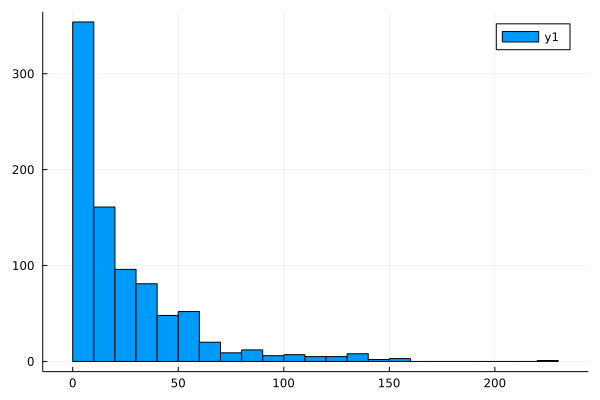

In [217]:
histogram(w16[!, :Depression_adj])

In [166]:
w1 = CSV.read("../output/v2/w1.csv", DataFrame)
w6 = CSV.read("../output/v2/w6.csv", DataFrame)

,PROLIFIC_PID,Gender,Education,Income,Political_Views,Age,Race,Depression,Stress,Anxiety,Fear_COVID,Emotional_Support,Loneliness,slope_new_cases,slope_new_deaths,GatheringStrictness
,String31,Bool,Float64,Float64,Float64,Float64,Float64,Int64,Int64,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,5c7e91c1973c990016ea72b0,0,5.0,1.0,1.0,55.0,5.0,16,29,40,21.0,40.0,8.0,13.7143,2.28571,1.0
2,5e67052c757e6149c38ce468,1,1.0,1.0,4.0,23.0,7.0,51,22,71,14.0,9.0,25.0,13.7143,2.28571,1.0
3,5d89106d1719af0001ee23e5,0,2.0,1.0,6.0,47.0,5.0,0,6,29,0.0,40.0,5.0,13.7143,2.28571,1.0
4,5d6394518df2870001a74b42,0,2.0,1.0,1.0,23.0,5.0,53,35,48,17.0,40.0,13.0,13.7143,2.28571,1.0
5,5bdd368719b9ba000157fb12,0,3.0,1.0,4.0,28.0,5.0,8,3,33,12.0,40.0,5.0,13.7143,2.28571,1.0
6,5a8ce265000dab00018ce084,0,4.0,6.0,3.0,50.0,5.0,11,16,25,1.0,35.0,12.0,13.7143,2.28571,1.0
7,5c72efa770d5a200018028f1,1,5.0,2.0,3.0,71.0,5.0,1,3,25,13.0,39.0,5.0,13.7143,2.28571,1.0
8,5aea962d0ef2f20001858c9c,1,2.0,1.0,2.0,36.0,5.0,28,32,58,11.0,19.0,14.0,13.7143,2.28571,1.0
9,5e4b793f03c92a08a6d28e3f,1,2.0,1.0,4.0,21.0,2.0,22,20,49,5.0,16.0,15.0,13.7143,2.28571,1.0


In [167]:
adjustments = ["Income", "Gender", "Age", "Education", "Race_AA", "Race_W"]
square_terms = ["Income", "Age", "Education"]
treatment = "low_quality"
target = "Depression"

"Depression"

In [168]:
w6[:, :low_quality] = sum.(eachrow(w6[!, QUALITY_OUTPUT_NAME])) .>= 1

1178-element BitVector:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [169]:
w6[!, :low_quality]

1178-element BitVector:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [170]:
fit = cal_ipw(w6, adjustments, square_terms, treatment)

StatsModels.TableRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Distributions.Binomial{Float64}, GLM.ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

low_quality ~ 1 + Income + Gender + Age + Education + Race_AA + Race_W + Income^2 + Age^2 + Education^2

Coefficients:
───────────────────────────────────────────────────────────────────────────────────
                    Coef.    Std. Error      z  Pr(>|z|)     Lower 95%    Upper 95%
───────────────────────────────────────────────────────────────────────────────────
(Intercept)  -2.65234       1.34173      -1.98    0.0481   -5.28207     -0.0225998
Income       -0.199988      0.286802     -0.70    0.4856   -0.762109     0.362133
Gender       -0.0875126     0.240528     -0.36    0.7160   -0.558938     0.383913
Age           0.042778      0.0717598     0.60    0.5511   -0.0978686    0.183425
Education     0.0394582     0.361571      0.11    0.9131   -0.66

In [171]:
w6[!, :low_quality]

1178-element BitVector:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [172]:
w1_w6_combined = combine_wave_data(w1, w6, "PROLIFIC_PID", "w1", "w6")

,PROLIFIC_PID,Gender_w1,Education_w1,Income_w1,Political_Views_w1,Age_w1,Race_w1,Depression_w1,Stress_w1,Anxiety_w1,Fear_COVID_w1,Emotional_Support_w1,Loneliness_w1,slope_new_cases_w1
,String31,Bool?,Float64?,Float64?,Float64?,Float64?,Float64?,Missing,Missing,Int64?,Float64?,Float64?,Float64?,Float64?
1,5c7e91c1973c990016ea72b0,0,5.0,3.0,1.0,55.0,5.0,missing,missing,69,24.0,30.0,10.0,82.2857
2,5e67052c757e6149c38ce468,1,1.0,1.0,4.0,23.0,7.0,missing,missing,57,18.0,14.0,25.0,82.2857
3,5d89106d1719af0001ee23e5,0,2.0,1.0,6.0,47.0,5.0,missing,missing,27,8.0,40.0,5.0,82.2857
4,5d6394518df2870001a74b42,0,2.0,1.0,1.0,23.0,5.0,missing,missing,42,23.0,40.0,16.0,82.2857
5,5bdd368719b9ba000157fb12,0,3.0,4.0,4.0,28.0,5.0,missing,missing,29,10.0,40.0,5.0,82.2857
6,5a8ce265000dab00018ce084,0,4.0,6.0,3.0,50.0,5.0,missing,missing,37,6.0,34.0,7.0,82.2857
7,5c72efa770d5a200018028f1,1,5.0,2.0,3.0,71.0,5.0,missing,missing,27,9.0,39.0,5.0,82.2857
8,5aea962d0ef2f20001858c9c,1,2.0,1.0,2.0,36.0,5.0,missing,missing,59,17.0,17.0,16.0,82.2857
9,5e4b793f03c92a08a6d28e3f,1,2.0,7.0,4.0,21.0,2.0,missing,missing,42,4.0,18.0,11.0,82.2857


In [173]:
w1_w6_combined[!,:low_quality_w6]

1797-element Vector{Union{Missing, Bool}}:
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
     ⋮
      missing
      missing
      missing
      missing
      missing
      missing
      missing
      missing
      missing

In [176]:
w1_w6_combined[!, :dropout] = w1_w6_combined[!, "Depression_w6"].===missing

1797-element BitVector:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [177]:
adjustments = ["Income_w1", "Gender_w1", "Age_w1", "Education_w1", "Race_AA_w1", "Race_W_w1"]
square_terms = ["Income_w1", "Age_w1", "Education_w1"]
treatment = "dropout"
target = "Depression"

"Depression"

In [178]:
fit = cal_ipw(w1_w6_combined, adjustments, square_terms, treatment)

StatsModels.TableRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Distributions.Binomial{Float64}, GLM.ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

dropout ~ 1 + Income_w1 + Gender_w1 + Age_w1 + Education_w1 + Race_AA_w1 + Race_W_w1 + Income_w1^2 + Age_w1^2 + Education_w1^2

Coefficients:
────────────────────────────────────────────────────────────────────────────────────
                      Coef.   Std. Error      z  Pr(>|z|)     Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────────
(Intercept)      0.364975    0.29204       1.25    0.2114  -0.207413     0.937363
Income_w1        0.0855109   0.0783456     1.09    0.2751  -0.0680437    0.239065
Gender_w1       -0.0105184   0.0624086    -0.17    0.8662  -0.132837     0.1118
Age_w1          -0.0194272   0.0142339    -1.36    0.1723  -0.0473251    0.00847077
Education_w1    -0.0854097   0.0835617 

In [179]:
w1_w6_combined[!, :total_w] = w1_w6_combined[!, :low_quality_w_w6] .* w1_w6_combined[!, :dropout_w]

1797-element Vector{Union{Missing, Float64}}:
 0.7448289595782437
 0.5254083769860263
 0.6919217857837503
 0.5378375413599564
 0.5821569008525971
 0.7625834075157938
 0.819182198225355
 0.6292042567899955
 0.6392747674979793
 0.6391023954042704
 ⋮
  missing
  missing
  missing
  missing
  missing
  missing
  missing
  missing
  missing

In [180]:
w1_w6_combined[!, :Depression_adj] = w1_w6_combined[!, :Depression_w6] .* (1 ./ w1_w6_combined[!, :total_w])

1797-element Vector{Union{Missing, Float64}}:
 21.481441872319163
 97.0673522423804
  0.0
 98.54276788858236
 13.741999774087727
 14.424651640184264
  1.2207296522878082
 44.50065252712576
 34.41399710816764
 20.34102843845034
  ⋮
   missing
   missing
   missing
   missing
   missing
   missing
   missing
   missing
   missing

In [186]:
open("file.txt","a") do io
    println(io,"a=",a)
 end
println(fit)

StatsModels.TableRegressionModel{GLM.GeneralizedLinearModel{GLM.GlmResp{Vector{

Float64}, Distributions.Binomial{Float64}, GLM.ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

dropout ~ 1 + Income_w1 + Gender_w1 + Age_w1 + Education_w1 + Race_AA_w1 + Race_W_w1 + Income_w1^2 + Age_w1^2 + Education_w1^2

Coefficients:


────────────────────────────────────────────────────────────────────────────────────
                      Coef.   Std. Error      z  Pr(>|z|)     Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────────
(Intercept)      0.364975    0.29204       1.25    0.2114  -0.207413     0.937363
Income_w1        0.0855109   0.0783456     1.09    0.2751  -0.0680437    0.239065
Gender_w1       -0.0105184   0.0624086    -0.17    0.8662  -0.132837     0.1118
Age_w1          -0.0194272   0.0142339    -1.36    0.1723  -0.0473251    0.00847077
Education_w1    -0.0854097   0.0835617    -1.02    0.3067  -0.249188     0.0783682
Race_AA_w1      -0.117006    0.133005     -0.88    0.3790  -0.377691     0.143678
Race_W_w1        0.00240504  0.0814446     0.03    0.9764  -0.157223     0.162034
Income_w1^2     -0.0164083   0.0114175    -1.44    0.1507  -0.0387862    0.00596959
Age_w1^2         3.89681e-5  0.000168463   0.23    0.8171  -0.000291213  0.000369149
E

In [ ]:
w1_w6_combined[(w1_w6_combined[!, :Depression_adj] .!==missing) .& (w1_w6_combined[!, :low_quality_w6] .== 0), r"_this"]

In [191]:
selected = w1_w6_combined[(w1_w6_combined[!, :Depression_adj] .!==missing) .& (w1_w6_combined[!, :low_quality_w6] .== 0), r"_w6"]

,Gender_w6,Education_w6,Income_w6,Political_Views_w6,Age_w6,Race_w6,Depression_w6,Stress_w6,Anxiety_w6,Fear_COVID_w6,Emotional_Support_w6,Loneliness_w6,slope_new_cases_w6,slope_new_deaths_w6
,Bool?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64?,Int64?,Int64?,Float64?,Float64?,Float64?,Float64?,Float64?
1,0,5.0,1.0,1.0,55.0,5.0,16,29,40,21.0,40.0,8.0,13.7143,2.28571
2,1,1.0,1.0,4.0,23.0,7.0,51,22,71,14.0,9.0,25.0,13.7143,2.28571
3,0,2.0,1.0,6.0,47.0,5.0,0,6,29,0.0,40.0,5.0,13.7143,2.28571
4,0,2.0,1.0,1.0,23.0,5.0,53,35,48,17.0,40.0,13.0,13.7143,2.28571
5,0,3.0,1.0,4.0,28.0,5.0,8,3,33,12.0,40.0,5.0,13.7143,2.28571
6,0,4.0,6.0,3.0,50.0,5.0,11,16,25,1.0,35.0,12.0,13.7143,2.28571
7,1,5.0,2.0,3.0,71.0,5.0,1,3,25,13.0,39.0,5.0,13.7143,2.28571
8,1,2.0,1.0,2.0,36.0,5.0,28,32,58,11.0,19.0,14.0,13.7143,2.28571
9,1,2.0,1.0,4.0,21.0,2.0,22,20,49,5.0,16.0,15.0,13.7143,2.28571


In [202]:
original_name = names(selected)


29-element Vector{String}:
 "Gender_w6"
 "Education_w6"
 "Income_w6"
 "Political_Views_w6"
 "Age_w6"
 "Race_w6"
 "Depression_w6"
 "Stress_w6"
 "Anxiety_w6"
 "Fear_COVID_w6"
 ⋮
 "wave_w6"
 "RW1_8_w6"
 "Race_AA_w6"
 "Race_W_w6"
 "low_quality_w6"
 "Income^2_w6"
 "Age^2_w6"
 "Education^2_w6"
 "low_quality_w_w6"

In [205]:
original_name = names(selected)

replace.(original_name, "_w6" => "") 

29-element Vector{String}:
 "Gender"
 "Education"
 "Income"
 "Political_Views"
 "Age"
 "Race"
 "Depression"
 "Stress"
 "Anxiety"
 "Fear_COVID"
 ⋮
 "wave"
 "RW1_8"
 "Race_AA"
 "Race_W"
 "low_quality"
 "Income^2"
 "Age^2"
 "Education^2"
 "low_quality_w"

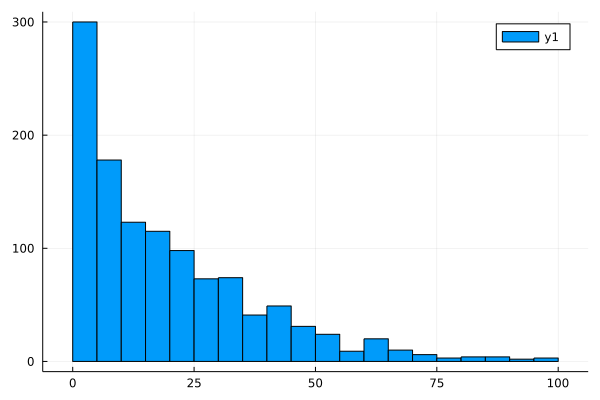

In [183]:
histogram(selected)

In [4]:
# Process Meta data
# Set view columns
ENV["COLUMNS"] = 200
# Variables selected
selected_variables = [DEMOGRAPHICS; PSYCHOLOGICAL; EXTERNAL; QUALITY; EXTRAS]

21-element Vector{String}:
 "PROLIFIC_PID"
 "Sex"
 "Education"
 "Income_HH"
 "DemM7_KNN"
 "BDI_total_raw"
 "PSS_Total"
 "STAI_State_raw"
 "Fear_COVID_raw_KNN"
 "NIH_TB_Emot_Support_raw_total_KNN"
 ⋮
 "slope_new_deaths"
 "GatheringStrictness_KNN"
 "Mandatory_business_closure"
 "Mandatory_PPE_masks"
 "more_than_1_attQ_failed"
 "string_outlier_core"
 "response_consistency"
 "wave"
 "RW1_8"

In [6]:
w1 = rename!(extract_wave(data, 1, selected_variables), VARNAME_MAPPING)
w6 = rename!(extract_wave(data, 6, selected_variables), VARNAME_MAPPING)

,PROLIFIC_PID,Gender,Education,Income,Political_Views,Depression,Stress,Anxiety,Fear_COVID,Emotional_Support,Loneliness,slope_new_cases,slope_new_deaths,GatheringStrictness
,String31,Float64,Float64,Float64,Float64,Int64?,Int64?,Int64,Float64,Float64,Float64,Float64,Float64,Float64
1,5c7e91c1973c990016ea72b0,2.0,5.0,1.0,1.0,16,29,40,21.0,40.0,8.0,13.7143,2.28571,1.0
2,5e67052c757e6149c38ce468,1.0,1.0,1.0,4.0,51,22,71,14.0,9.0,25.0,13.7143,2.28571,1.0
3,5d89106d1719af0001ee23e5,2.0,2.0,1.0,6.0,0,6,29,0.0,40.0,5.0,13.7143,2.28571,1.0
4,5d6394518df2870001a74b42,2.0,2.0,1.0,1.0,53,35,48,17.0,40.0,13.0,13.7143,2.28571,1.0
5,5bdd368719b9ba000157fb12,2.0,3.0,1.0,4.0,8,3,33,12.0,40.0,5.0,13.7143,2.28571,1.0
6,5a8ce265000dab00018ce084,2.0,4.0,6.0,3.0,11,16,25,1.0,35.0,12.0,13.7143,2.28571,1.0
7,5c72efa770d5a200018028f1,1.0,5.0,2.0,3.0,1,3,25,13.0,39.0,5.0,13.7143,2.28571,1.0
8,5aea962d0ef2f20001858c9c,1.0,2.0,1.0,2.0,28,32,58,11.0,19.0,14.0,13.7143,2.28571,1.0
9,5e4b793f03c92a08a6d28e3f,1.0,2.0,1.0,4.0,22,20,49,5.0,16.0,15.0,13.7143,2.28571,1.0


In [8]:
w1_w6_combine_data = combine_wave_data(w1, w6, "PROLIFIC_PID", "w1", "w6")

,PROLIFIC_PID,Gender_w1,Education_w1,Income_w1,Political_Views_w1,Depression_w1,Stress_w1,Anxiety_w1,Fear_COVID_w1,Emotional_Support_w1,Loneliness_w1,slope_new_cases_w1,slope_new_deaths_w1
,String31,Float64?,Float64?,Float64?,Float64?,Int64?,Int64?,Int64?,Float64?,Float64?,Float64?,Float64?,Float64?
1,5c7e91c1973c990016ea72b0,2.0,5.0,3.0,1.0,missing,missing,69,24.0,30.0,10.0,82.2857,3.28571
2,5e67052c757e6149c38ce468,1.0,1.0,1.0,4.0,missing,missing,57,18.0,14.0,25.0,82.2857,3.28571
3,5d89106d1719af0001ee23e5,2.0,2.0,1.0,6.0,missing,missing,27,8.0,40.0,5.0,82.2857,3.28571
4,5d6394518df2870001a74b42,2.0,2.0,1.0,1.0,missing,missing,42,23.0,40.0,16.0,82.2857,3.28571
5,5bdd368719b9ba000157fb12,2.0,3.0,4.0,4.0,missing,missing,29,10.0,40.0,5.0,82.2857,3.28571
6,5a8ce265000dab00018ce084,2.0,4.0,6.0,3.0,missing,missing,37,6.0,34.0,7.0,82.2857,3.28571
7,5c72efa770d5a200018028f1,1.0,5.0,2.0,3.0,missing,missing,27,9.0,39.0,5.0,82.2857,3.28571
8,5aea962d0ef2f20001858c9c,1.0,2.0,1.0,2.0,missing,missing,59,17.0,17.0,16.0,82.2857,3.28571
9,5e4b793f03c92a08a6d28e3f,1.0,2.0,7.0,4.0,missing,missing,42,4.0,18.0,11.0,82.2857,3.28571


In [21]:
data[!, :wave]==1b

false

In [45]:
interpolate_age(data)

In [50]:
data[data[!, :PROLIFIC_PID].==unique_pid[3],:prlfc_dem_age]

9-element Vector{Union{Missing, Float64}}:
 23.0
 23.0
 23.0
 23.0
 23.0
 23.0
 23.0
 23.0
 23.0

In [23]:
unique_pid = unique(data[data[!, :wave].==1, :PROLIFIC_PID])

1797-element Vector{String31}:
 "5df82e8739bcde5dd044f741"
 "5c7e91c1973c990016ea72b0"
 "5e67052c757e6149c38ce468"
 "5d89106d1719af0001ee23e5"
 "5d6394518df2870001a74b42"
 "5bdd368719b9ba000157fb12"
 "5b68d45687af3100015849a9"
 "5a8ce265000dab00018ce084"
 "5c72efa770d5a200018028f1"
 "5d378df21acda30001e7191e"
 ⋮
 "5da926115c6987001535a2da"
 "5c054e8a553fb800011917d7"
 "5cad4750f4115800176d506e"
 "5be8846293ca1f00014db03c"
 "5dbd1569f8223b28d73ed6ae"
 "5e217a34e8ff3a469b5dfebc"
 "5d63867550d0dd0017805976"
 "5e6155e6f169c0046b6d6518"
 "58cefdb030c4cf0001ceb3ac"

In [29]:
unique_pid[1]

"5df82e8739bcde5dd044f741"

In [35]:
w1 = data[data[!, :wave].==1, :]

data[!, :PROLIFIC_PID].==unique_pid[1]

18493-element BitVector:
 1
 1
 1
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [38]:
data[data[!, :PROLIFIC_PID].==unique_pid[1],"prlfc_dem_age"] .= w1[w1[!, :PROLIFIC_PID].==unique_pid[1], :prlfc_dem_age]

3-element view(::SentinelArrays.SentinelVector{Float64, Float64, Missing, Vector{Float64}}, [1, 2, 3]) with eltype Union{Missing, Float64}:
 32.0
 32.0
 32.0

In [39]:
data[data[!, :PROLIFIC_PID].==unique_pid[1],"prlfc_dem_age"]

3-element Vector{Union{Missing, Float64}}:
 32.0
 32.0
 32.0

In [ ]:
for id in unique_pid
    data[data[!, :PROLIFIC_PID].==id, :prlfc_dem_age] = 
end

In [19]:
w6[!, "wave"]

1797-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1